In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

UNIFIED_CSV = "/home/kiwi-pandas/Documents/humor-harm-api/unified_dataset.csv"

df = pd.read_csv(UNIFIED_CSV, dtype=str)
print("rows:", len(df))
print("cols:", len(df.columns))

df.head(10)

rows: 1550
cols: 27


,id,transcript_text,dark_intensity,humor_presence,humor_type,joke_topic,rhetorical_device,stand_up,target_category,note,video_id,url,title,description,tags,channel,channel_id,uploader,uploader_id,upload_date,duration,view_count,like_count,comment_count,categories,language,searched_keyword
0,1,Imagine Bill Maher being the voice of reason f...,1 - Mild,Humor,Dark Humor,Politics and society,"{""choices"":[""Irony"",""Satire""]}",Yes,Race / Ethnicity,NaN,-xEw-SdaVJ0,https://www.youtube.com/watch?v=-xEw-SdaVJ0,Bill Maher Crushes Woke Culture,NaN,NaN,Red Shorts Politics,UCA51l1PI_lNs-mTo3bmQfEw,Red Shorts Politics,@RedShortsPolitics,20250816,50,1585516,50081,1700,People & Blogs,en-US,Keyword_BillMaherfunny
1,2,I've always been an animal lover. Ever since I...,NaN,Not Humor,None of these,Other,None of these,No,NaN,NaN,XDuGBcv_R80,https://www.youtube.com/watch?v=XDuGBcv_R80,Her Parents Hated DOGS?!?! 😳 #jaidenanimations...,Her Parents Hated DOGS?!?! 😳 #jaidenanimations...,NaN,GlamourTV-1,UCW-4jz8O0yTKWNYx6lsI9tQ,GlamourTV-1,@GlamourTV-1,20250609,58,55179,NaN,7,People & Blogs,en,Keyword_JaidenAnimationsfunny
2,3,Quagmire. I'm going to get unbanned from hinge...,NaN,Not Humor,None of these,Celebrity and pop culture,None of these,No,NaN,NaN,XF5atSzGKRI,https://www.youtube.com/watch?v=XF5atSzGKRI,Seth MacFarlane switches voices effortlessly,Seth MacFarlane switches voices effortlessly,NaN,Gossip 0791,UCStY6tSbOjaxPEpcTfk5_Rw,Gossip 0791,@Gossip0791,20251014,59,42781021,1412321,3700,People & Blogs,en,Keyword_TheLateNightShowfunny
3,4,"This is terrifying. Oh no, oh no. Oh! Oh! Oh. ...",NaN,Almost or not sure,None of these,Other,None of these,No,NaN,NaN,XNtTO_339kU,https://www.youtube.com/watch?v=XNtTO_339kU,"Pick The Wrong Tube, Get Slimed",NaN,NaN,MrBeast,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,@MrBeast,20250827,35,130134357,2913478,8800,Entertainment,en,Keyword_MrBeastfunny
4,5,उगर्टा है? � oui jan off cro Likeogy ad Search...,NaN,Humor,Regular Humor,Celebrity and pop culture,None of these,No,NaN,Not English,XPx_U-Gw5II,https://www.youtube.com/watch?v=XPx_U-Gw5II,#BabyJohn Stars Join the Fun This Weekend Only...,#BabyJohn Stars Join the Fun This Weekend Only...,kapil sharma|kapil sharma show|the great india...,Kapil Sharma,UC1-BQ2oxqBVtCjMHF-Wf98w,Kapil Sharma,@KapilSharmaK9,20241212,13,24433305,645465,1000,Entertainment,NaN,Keyword_TheLateNightShowfunny
5,6,Name somebody who might take a bride. You're a...,NaN,Not Humor,None of these,Other,None of these,No,NaN,NaN,XXFAYUNfJy4,https://www.youtube.com/watch?v=XXFAYUNfJy4,Top 6 funniest Family Feud Steve Harvey Moment...,🤣 Get ready to laugh out loud with the Top 6 F...,"funny family feud,steve harvey moments,funny g...",Feud Shorts,UCcIQFebmRz30KUVq7JjfbDg,Feud Shorts,@Feud.Shorts1,20250621,101,208150,NaN,50,Entertainment,en,Keyword_SteveHarveyfunny
6,7,Eminem is in this one. I love Eminem. I'm frie...,NaN,Humor,Regular Humor,Celebrity and pop culture,None of these,No,NaN,NaN,XgMK__cSmho,https://www.youtube.com/watch?v=XgMK__cSmho,Adam Sandler on Eminem | Happy Gilmore 2025,"Credits: Adam Sandler, Eminem, Happy Gilmore 2...",adam sandler on eminem|happy gilmore 2 eminem|...,Sin City Media,UC6gN90cQeAcmpAAc8QBRMkA,Sin City Media,@TheSinCityMedia,20250804,27,1381117,28677,162,Music,en,Keyword_AdamSandlerfunny
7,8,Is there any particular reason why you have se...,1 - Mild,Humor,Dark Humor,Crime and law enforcement,Irony,Yes,Violence / Death,NaN,XjsdnyYj4Gc,https://www.youtube.com/watch?v=XjsdnyYj4Gc,Fluffy's hilarious gun advice | Gabriel Iglesias,Legend of Fluffy\n\n#StandUpComedy #StandUp #C...,NaN,Comedy Hubbie,UC55YdoeTtxrPqHJ6TSPIAyQ,Comedy Hubbie,@comedyhubbie,20250509,109,844025,32798,189,Comedy,en,Keyword_GabrielIglesiasfunny
8,9,We just saved Mr. Beast from going blind. It c...,NaN,Not Humor,None of these,Celebrity and pop culture,None of these,No,NaN,NaN,Xxgx-k5uJhc,https://www.youtube.com/watch?v=Xxgx-k5uJhc,We Saved MrBeast From Going BLIND 😱,"beast games, mrbeast new show, mrbeast blind

In [9]:
def is_missing_series(s: pd.Series) -> pd.Series:
    # Treat NaN, empty string, and literal "nan" as missing
    x = s.astype("string")
    return x.isna() | (x.str.strip() == "") | (x.str.strip().str.lower() == "nan")

missing_mask = df.apply(is_missing_series)

missing_counts = missing_mask.sum(axis=0).sort_values(ascending=False)
missing_pct = (missing_counts / len(df) * 100).round(2)

missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct,
    "non_missing_count": len(df) - missing_counts,
})

missing_summary

,missing_count,missing_pct,non_missing_count
note,1549,99.94,1
target_category,1526,98.45,24
dark_intensity,1461,94.26,89
stand_up,1276,82.32,274
joke_topic,1108,71.48,442
rhetorical_device,1108,71.48,442
humor_presence,1108,71.48,442
humor_type,1108,71.48,442
tags,1009,65.1,541
description,757,48.84,793


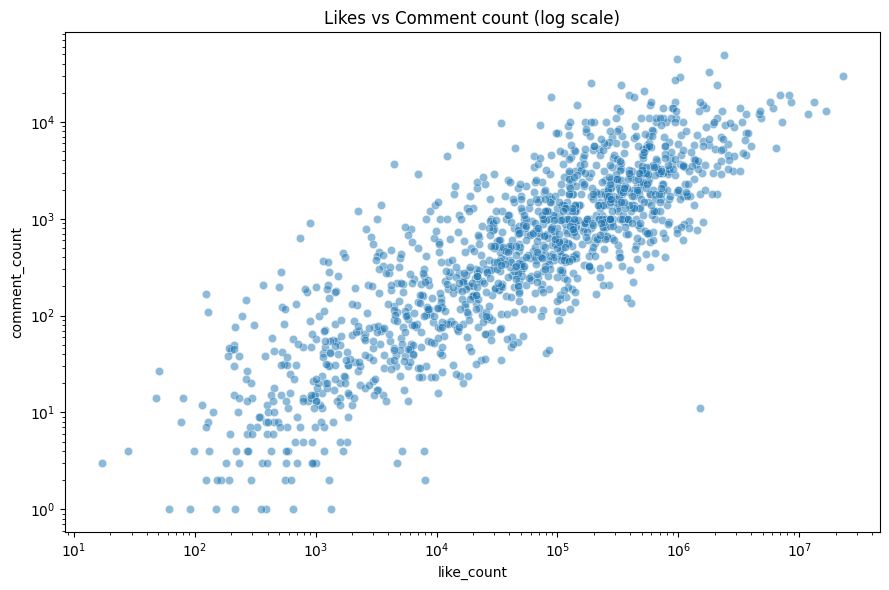

In [40]:
# Plot 3 (one cell): Likes vs Comment counts (scatter, log scale)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

UNIFIED_CSV = "/home/kiwi-pandas/Documents/humor-harm-api/unified_dataset.csv"
df = pd.read_csv(UNIFIED_CSV, dtype=str)

def to_num(s):
    s = s.astype("string")
    s = s.str.replace(",", "", regex=False).str.replace(" ", "", regex=False)
    s = s.replace({"": pd.NA, "nan": pd.NA, "None": pd.NA, "null": pd.NA})
    return pd.to_numeric(s, errors="coerce")

like_col = "like_count" if "like_count" in df.columns else ("likes" if "likes" in df.columns else None)
comm_col = "comment_count" if "comment_count" in df.columns else ("comments" if "comments" in df.columns else None)

if like_col is None:
    raise ValueError("No likes column found (like_count or likes)")
if comm_col is None:
    raise ValueError("No comment count column found (comment_count or comments)")

df[like_col] = to_num(df[like_col])
df[comm_col] = to_num(df[comm_col])

plot_df = df[[like_col, comm_col]].dropna().copy()

plt.figure(figsize=(9, 6))
ax = sns.scatterplot(data=plot_df, x=like_col, y=comm_col, alpha=0.5)
ax.set_xscale("log")
ax.set_yscale("log")
plt.title("Likes vs Comment count (log scale)")
plt.tight_layout()
plt.show()


rows: 1550 cols: 27
columns: ['id', 'transcript_text', 'dark_intensity', 'humor_presence', 'humor_type', 'joke_topic', 'rhetorical_device', 'stand_up', 'target_category', 'note', 'video_id', 'url', 'title', 'description', 'tags', 'channel', 'channel_id', 'uploader', 'uploader_id', 'upload_date', 'duration', 'view_count', 'like_count', 'comment_count', 'categories', 'language', 'searched_keyword']
using columns: {'views': 'view_count', 'likes': 'like_count', 'comments': 'comment_count', 'keywords': 'searched_keyword'}


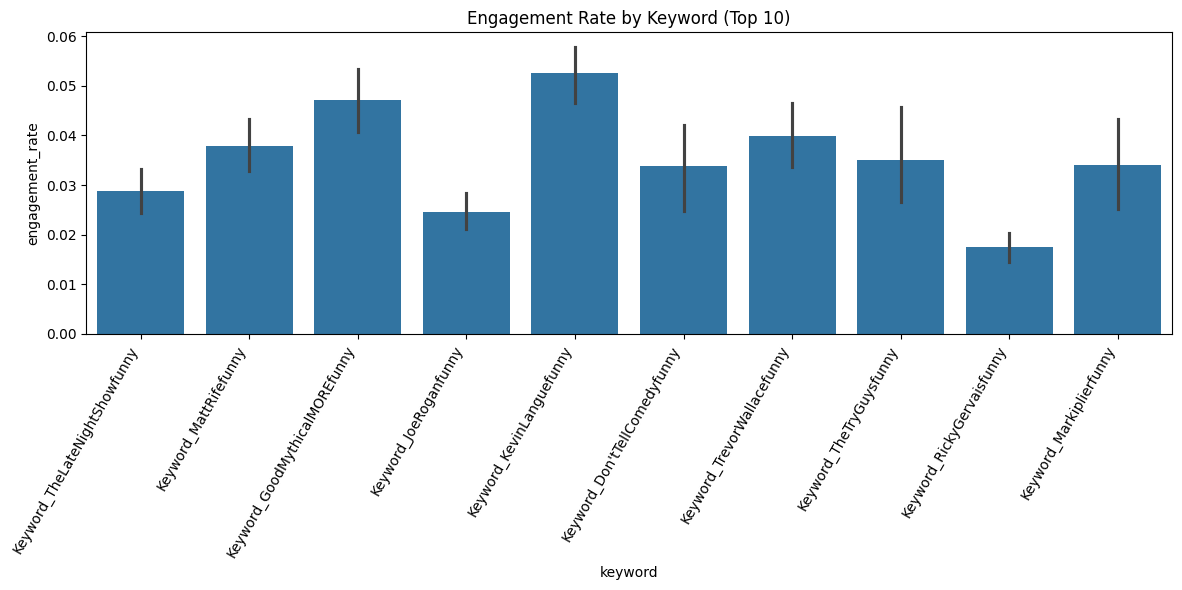

In [61]:
# Plot 1 (one cell): Engagement rate by keyword (auto column detection)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

UNIFIED_CSV = "/home/kiwi-pandas/Documents/humor-harm-api/unified_dataset.csv"
df = pd.read_csv(UNIFIED_CSV, dtype=str)

print("rows:", len(df), "cols:", len(df.columns))
print("columns:", list(df.columns))

def pick_col(cols, candidates):
    cols_lower = {c.lower(): c for c in cols}
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols_lower[cand.lower()]
    # fallback: substring match
    for cand in candidates:
        for c in cols:
            if cand.lower() in c.lower():
                return c
    return None

def to_num(series):
    s = series.astype("string")
    s = s.str.replace(",", "", regex=False).str.replace(" ", "", regex=False)
    s = s.replace({"": pd.NA, "nan": pd.NA, "None": pd.NA, "null": pd.NA})
    return pd.to_numeric(s, errors="coerce")

view_col = pick_col(df.columns, ["view_count", "views", "view"])
like_col = pick_col(df.columns, ["like_count", "likes", "like"])
comm_col = pick_col(df.columns, ["comment_count", "comments", "comment"])
kw_col   = pick_col(df.columns, ["searched_keyword", "keyword"])

print("using columns:", {"views": view_col, "likes": like_col, "comments": comm_col, "keywords": kw_col})

if view_col is None or like_col is None or comm_col is None or kw_col is None:
    raise ValueError("Missing one of required columns. See printed 'using columns' above.")

df[view_col] = to_num(df[view_col])
df[like_col] = to_num(df[like_col])
df[comm_col] = to_num(df[comm_col])

# avoid divide by 0
df["engagement_rate"] = (df[like_col].fillna(0) + df[comm_col].fillna(0)) / df[view_col].replace({0: np.nan})

# explode keywords (supports "a; b; c")
df[kw_col] = df[kw_col].fillna("").astype(str)
df["keyword"] = df[kw_col].apply(lambda x: [k.strip() for k in x.split(";") if k.strip()])
df = df.explode("keyword")
df = df[df["keyword"].notna() & (df["keyword"].astype(str).str.strip() != "")].copy()

# clean rate
df["engagement_rate"] = pd.to_numeric(df["engagement_rate"], errors="coerce")
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["engagement_rate"])

# keep top 20 keywords by number of unique videos (uses video_id if present, else id)
id_col = pick_col(df.columns, ["video_id", "id"])
top_k = (
    df.groupby("keyword")[id_col].nunique()
    .sort_values(ascending=False)
    .head(10)
    .index
)
plot_df = df[df["keyword"].isin(top_k)].copy()

plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x="keyword", y="engagement_rate")
plt.xticks(rotation=60, ha="right")
plt.title("Engagement Rate by Keyword (Top 10)")
plt.tight_layout()
plt.show()

In [64]:
# Cell 1: Load unified + load comment sentiment file(s) + merge to video level

import os, glob, re
import pandas as pd
import numpy as np

UNIFIED_CSV = "/home/kiwi-pandas/Documents/humor-harm-api/unified_dataset.csv"

# CHANGE THIS if your sentiment file is somewhere else
# Option A: a single CSV with all comments
COMMENTS_CSV = "/home/kiwi-pandas/Documents/humor-harm-api/scripts/comment_analysis/video_level_scores.csv"

# Option B: a folder of per-video comment CSVs (uncomment if needed)
# COMMENTS_DIR = "/home/kiwi-pandas/Documents/humor-harm-api/comments"

df = pd.read_csv(UNIFIED_CSV, dtype=str)

def pick_col(cols, candidates):
    cols_lower = {c.lower(): c for c in cols}
    for cand in candidates:
        if cand.lower() in cols_lower:
            return cols_lower[cand.lower()]
    for cand in candidates:
        for c in cols:
            if cand.lower() in c.lower():
                return c
    return None

def to_num(series):
    s = series.astype("string").str.replace(",", "", regex=False).str.replace(" ", "", regex=False)
    s = s.replace({"": pd.NA, "nan": pd.NA, "None": pd.NA, "null": pd.NA})
    return pd.to_numeric(s, errors="coerce")

# --- load comments ---
if os.path.exists(COMMENTS_CSV):
    cdf = pd.read_csv(COMMENTS_CSV, dtype=str)
else:
    raise FileNotFoundError(
        f"Could not find {COMMENTS_CSV}. "
        f"Point COMMENTS_CSV to your comment sentiment CSV (must include video_id + sentiment)."
    )

# detect cols
vid_col = pick_col(cdf.columns, ["video_id", "video", "yt_id", "youtube_id", "id"])
sent_col = pick_col(cdf.columns, ["sentiment", "sentiment_signed", "compound", "polarity", "vader_compound"])

if vid_col is None or sent_col is None:
    raise ValueError(f"Need video_id and sentiment columns. Found columns: {list(cdf.columns)}")

cdf["video_id"] = cdf[vid_col].astype(str).str.strip()
cdf["sentiment"] = to_num(cdf[sent_col])

# Aggregate to video level
sent_video = (
    cdf.dropna(subset=["video_id", "sentiment"])
      .groupby("video_id")
      .agg(
          comment_sentiment_mean=("sentiment", "mean"),
          comment_sentiment_median=("sentiment", "median"),
          n_comments_used=("sentiment", "count"),
      )
      .reset_index()
)

print("videos with sentiment:", len(sent_video))
print(sent_video.head())

# Merge into unified df
df["video_id"] = df["video_id"].astype(str).str.strip()
df = df.merge(sent_video, on="video_id", how="left")

print("unified rows:", len(df))
print("missing comment_sentiment_mean:", df["comment_sentiment_mean"].isna().sum())
df.head()

videos with sentiment: 1446
      video_id  comment_sentiment_mean  comment_sentiment_median  \
0  --r7_yDKqEU               -0.004425                 -0.004425   
1  -0z1fHtwx-U               -0.056113                 -0.056113   
2  -1EV13ThpqE                 0.49848                   0.49848   
3  -2cNGsBTAT8               -0.224004                 -0.224004   
4  -3d2A5XaJY0                0.075576                  0.075576   

   n_comments_used  
0                1  
1                1  
2                1  
3                1  
4                1  
unified rows: 1550
missing comment_sentiment_mean: 104


,id,transcript_text,dark_intensity,humor_presence,humor_type,joke_topic,rhetorical_device,stand_up,target_category,note,video_id,url,title,description,tags,channel,channel_id,uploader,uploader_id,upload_date,duration,view_count,like_count,comment_count,categories,language,searched_keyword,comment_sentiment_mean,comment_sentiment_median,n_comments_used
0,1,Imagine Bill Maher being the voice of reason f...,1 - Mild,Humor,Dark Humor,Politics and society,"{""choices"":[""Irony"",""Satire""]}",Yes,Race / Ethnicity,NaN,-xEw-SdaVJ0,https://www.youtube.com/watch?v=-xEw-SdaVJ0,Bill Maher Crushes Woke Culture,NaN,NaN,Red Shorts Politics,UCA51l1PI_lNs-mTo3bmQfEw,Red Shorts Politics,@RedShortsPolitics,20250816,50,1585516,50081,1700,People & Blogs,en-US,Keyword_BillMaherfunny,-0.135717,-0.135717,1
1,2,I've always been an animal lover. Ever since I...,NaN,Not Humor,None of these,Other,None of these,No,NaN,NaN,XDuGBcv_R80,https://www.youtube.com/watch?v=XDuGBcv_R80,Her Parents Hated DOGS?!?! 😳 #jaidenanimations...,Her Parents Hated DOGS?!?! 😳 #jaidenanimations...,NaN,GlamourTV-1,UCW-4jz8O0yTKWNYx6lsI9tQ,GlamourTV-1,@GlamourTV-1,20250609,58,55179,NaN,7,People & Blogs,en,Keyword_JaidenAnimationsfunny,0.541188,0.541188,1
2,3,Quagmire. I'm going to get unbanned from hinge...,NaN,Not Humor,None of these,Celebrity and pop culture,None of these,No,NaN,NaN,XF5atSzGKRI,https://www.youtube.com/watch?v=XF5atSzGKRI,Seth MacFarlane switches voices effortlessly,Seth MacFarlane switches voices effortlessly,NaN,Gossip 0791,UCStY6tSbOjaxPEpcTfk5_Rw,Gossip 0791,@Gossip0791,20251014,59,42781021,1412321,3700,People & Blogs,en,Keyword_TheLateNightShowfunny,0.486467,0.486467,1
3,4,"This is terrifying. Oh no, oh no. Oh! Oh! Oh. ...",NaN,Almost or not sure,None of these,Other,None of these,No,NaN,NaN,XNtTO_339kU,https://www.youtube.com/watch?v=XNtTO_339kU,"Pick The Wrong Tube, Get Slimed",NaN,NaN,MrBeast,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,@MrBeast,20250827,35,130134357,2913478,8800,Entertainment,en,Keyword_MrBeastfunny,0.368249,0.368249,1
4,5,उगर्टा है? � oui jan off cro Likeogy ad Search...,NaN,Humor,Regular Humor,Celebrity and pop culture,None of these,No,NaN,Not English,XPx_U-Gw5II,https://www.youtube.com/watch?v=XPx_U-Gw5II,#BabyJohn Stars Join the Fun This Weekend Only...,#BabyJohn Stars Join the Fun This Weekend Only...,kapil sharma|kapil sharma show|the great india...,Kapil Sharma,UC1-BQ2oxqBVtCjMHF-Wf98w,Kapil Sharma,@KapilSharmaK9,20241212,13,24433305,645465,1000,Entertainment,NaN,Keyword_TheLateNightShowfunny,0.193142,0.193142,1


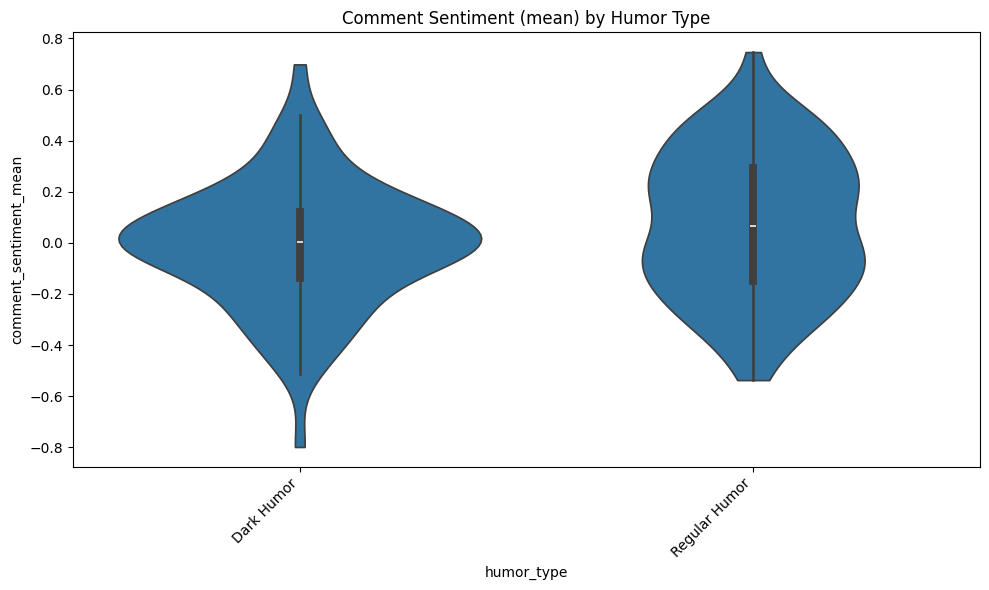

In [65]:
# Cell 2: Sentiment by humor_type (drop "None of these")

import seaborn as sns
import matplotlib.pyplot as plt

humor_type_col = "humor_type"
plot_df = df[[humor_type_col, "comment_sentiment_mean"]].dropna().copy()

plot_df = plot_df[plot_df[humor_type_col].astype(str).str.strip().str.lower() != "none of these"]

plt.figure(figsize=(10, 6))
sns.violinplot(data=plot_df, x=humor_type_col, y="comment_sentiment_mean", inner="box", cut=0)
plt.xticks(rotation=45, ha="right")
plt.title("Comment Sentiment (mean) by Humor Type")
plt.tight_layout()
plt.show()